<a href="https://colab.research.google.com/github/RohitVarma951/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

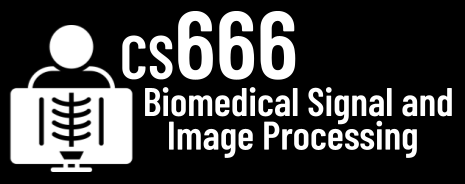

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 2.2 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [4]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [5]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [6]:
len(signal)

15000

In [7]:
len(signal)/metadata['sampling_rate']

15.0

In [8]:
SAMPLING_RATE = 1000.0 ### TODO! can be obtained from the data file
SECONDS = 15.0 ### TODO! 'size of sample/sampling rate' gives you the duration of sampling

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [9]:
### TODO
from biosppy.signals import ecg
out=ecg.ecg(signal=signal,sampling_rate=SAMPLING_RATE,show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

Text(0.5, 1.0, 'unfiltered signal plot')

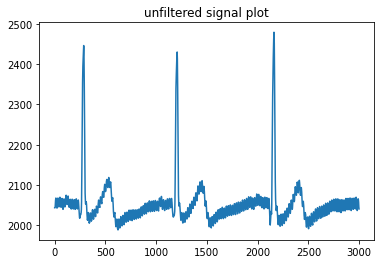

In [10]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt
plt.plot(signal[:int(3*SAMPLING_RATE)])
plt.title('unfiltered signal plot')

Text(0.5, 1.0, 'filtered signal plot')

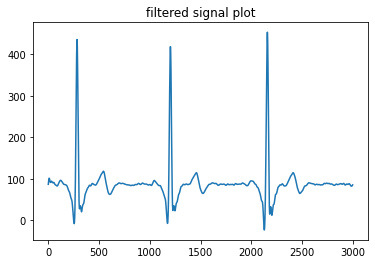

In [11]:
### TODO plot filtered signal
plt.plot(out['filtered'][:int(3*SAMPLING_RATE)])
plt.title('filtered signal plot')

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time [S]')

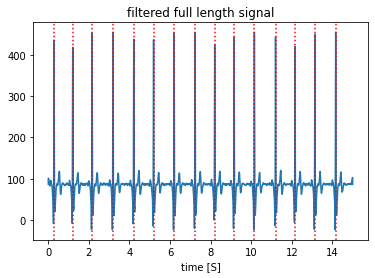

In [12]:
### TODO
import numpy as np
time=np.arange(len(out['filtered']))/SAMPLING_RATE
plt.plot(time,out['filtered'])
plt.title('filtered full length signal')
for i in out['rpeaks']:
  plt.axvline(x=i/SAMPLING_RATE,color='r',ls=':')
plt.xlabel('time [S]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [13]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


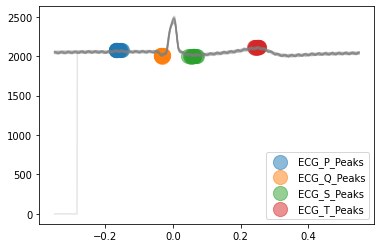

In [14]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
x,wave_peaks=nk.ecg_delineate(signal,out['rpeaks'],sampling_rate=SAMPLING_RATE,method="peak",show=True)

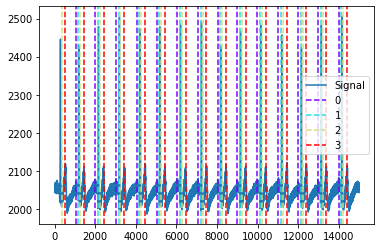

In [15]:
# TODO Does the detection work well? Yes, It works well.
plot=nk.events_plot([wave_peaks['ECG_P_Peaks'],
                     wave_peaks['ECG_Q_Peaks'],
                     wave_peaks['ECG_S_Peaks'],
                     wave_peaks['ECG_T_Peaks']],signal)

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


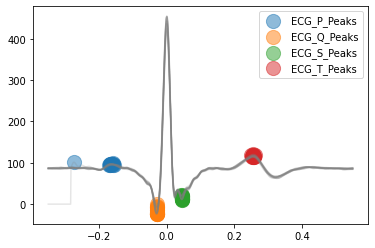

In [16]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
y,wave_peaks1=nk.ecg_delineate(out['filtered'],out['rpeaks'],sampling_rate=SAMPLING_RATE,method="peak",show_type="peaks",show=True)

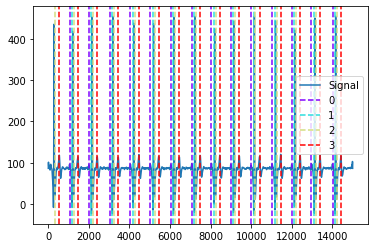

In [17]:
plot=nk.events_plot([wave_peaks['ECG_P_Peaks'],
                     wave_peaks['ECG_Q_Peaks'],
                     wave_peaks['ECG_S_Peaks'],
                     wave_peaks['ECG_T_Peaks']],out['filtered'])

In [18]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_signal=nk.signal_filter(signal,lowcut=15,highcut=50,sampling_rate=SAMPLING_RATE)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


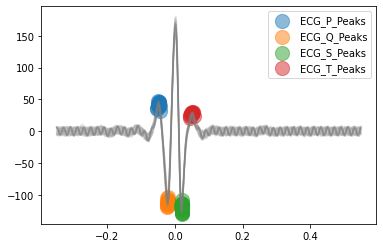

In [19]:
# Finally, run the delineation on the filtered signal from BioSPPY.
z,wave_peaks2=nk.ecg_delineate(filtered_signal,out['rpeaks'],sampling_rate=SAMPLING_RATE,method='peak',show=True)

In [20]:
# TODO Which one works the best?

In [21]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#